## Анализ данных в задаче Сбербанк (sdsj)

примеры визуализации

*Александр Дьяконов (2016)*

In [1]:
# подгружаем все нужные пакеты
import pandas as pd
import numpy as np


# для встроенных картинок
%pylab inline
# чуть покрасивше картинки:
pd.set_option('display.mpl_style', 'default')
figsize(12, 9)

import warnings
warnings.filterwarnings("ignore")

#plt.rcParams['figure.figsize'] = 10, 7.5
#plt.rcParams['axes.grid'] = True
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams['font.family'] = 'Ubuntu'

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rc('font', weight='bold')
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)

Populating the interactive namespace from numpy and matplotlib


/Users/d.parpulov/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2885: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
# чтобы был русский шрифт
from matplotlib import rc
 
font = {'family': 'Verdana',
        'weight': 'normal'}
rc('font', **font)

## Загрузка данных

In [3]:
transactions = pd.read_csv('transactions.csv') # d:\\Competitions\\sdsj\\
print (transactions.shape)
transactions[:5]

(6849346, 6)


customer_id tr_datetime  mcc_code  tr_type    amount term_id
0     39026145  0 10:23:26      4814     1030  -2245.92     NaN
1     39026145  1 10:19:29      6011     7010  56147.89     NaN
2     39026145  1 10:20:56      4829     2330 -56147.89     NaN
3     39026145  1 10:39:54      5499     1010  -1392.47     NaN
4     39026145  2 15:33:42      5499     1010   -920.83     NaN

In [7]:
tr_mcc_codes = pd.read_csv('tr_mcc_codes.csv', sep=';')
print (tr_mcc_codes.shape, transactions.mcc_code.nunique())
tr_mcc_codes[:5]

(184, 2) 184


mcc_code                                    mcc_description
0       742                                Ветеринарные услуги
1      1711  Генеральные подрядчики по вентиляции, теплосна...
2      1731                        Подрядчики по электричеству
3      1799  Подрядчики, специализированная торговля — нигд...
4      2741           Разнообразные издательства/печатное дело

In [10]:
tr_types = pd.read_csv('tr_types.csv', sep=';')
print (tr_types.shape, transactions.tr_type.nunique())
tr_types[:5]

(155, 2) 77


tr_type                                     tr_description
0     3200  Плата за предоставление услуг посредством моби...
1     3210  Плата за предоставление отчета по счету карты ...
2     3800  Плата за обслуживание банковской карты (за пер...
3     4000            Плата за получение наличных в Сбербанке
4     4001  Плата за получение наличных в Сбербанке (в дру...

In [12]:
customers_gender_train = pd.read_csv('customers_gender_train.csv')
print (customers_gender_train.shape)
customers_gender_train[:5]

(12000, 2)


customer_id  gender
0     75562265       0
1     10928546       1
2     69348468       1
3     84816985       1
4     61009479       0

## Формирование таблицы

In [13]:
# присоедниение пола
transactions = pd.merge(transactions, customers_gender_train, on='customer_id', how='outer')
print (transactions.shape)
transactions[:5]

(6849346, 7)


customer_id tr_datetime  mcc_code  tr_type    amount term_id  gender
0     39026145  0 10:23:26      4814     1030  -2245.92     NaN     1.0
1     39026145  1 10:19:29      6011     7010  56147.89     NaN     1.0
2     39026145  1 10:20:56      4829     2330 -56147.89     NaN     1.0
3     39026145  1 10:39:54      5499     1010  -1392.47     NaN     1.0
4     39026145  2 15:33:42      5499     1010   -920.83     NaN     1.0

In [14]:
transactions['num_day'] = transactions['tr_datetime'].apply(lambda x: int(x.split(' ')[0]))
transactions['datetime'] = transactions['tr_datetime'].apply(lambda x: x.split(' ')[1])
transactions['hour'] = transactions['datetime'].apply(lambda x: int(x.split(':')[0]))
transactions['minute'] = transactions['datetime'].apply(lambda x: int(x.split(':')[1]))
transactions['second'] = transactions['datetime'].apply(lambda x: int(x.split(':')[2]))
del transactions['tr_datetime']
transactions[:5]

customer_id  mcc_code  tr_type    amount term_id  gender  num_day  \
0     39026145      4814     1030  -2245.92     NaN     1.0        0   
1     39026145      6011     7010  56147.89     NaN     1.0        1   
2     39026145      4829     2330 -56147.89     NaN     1.0        1   
3     39026145      5499     1010  -1392.47     NaN     1.0        1   
4     39026145      5499     1010   -920.83     NaN     1.0        2   

   datetime  hour  minute  second  
0  10:23:26    10      23      26  
1  10:19:29    10      19      29  
2  10:20:56    10      20      56  
3  10:39:54    10      39      54  
4  15:33:42    15      33      42

In [15]:
# день недели
transactions['dayofweek'] = transactions['num_day'].apply(lambda x: (x + 4) % 7)

In [16]:
transactions[:5]

customer_id  mcc_code  tr_type    amount term_id  gender  num_day  \
0     39026145      4814     1030  -2245.92     NaN     1.0        0   
1     39026145      6011     7010  56147.89     NaN     1.0        1   
2     39026145      4829     2330 -56147.89     NaN     1.0        1   
3     39026145      5499     1010  -1392.47     NaN     1.0        1   
4     39026145      5499     1010   -920.83     NaN     1.0        2   

   datetime  hour  minute  second  dayofweek  
0  10:23:26    10      23      26          4  
1  10:19:29    10      19      29          5  
2  10:20:56    10      20      56          5  
3  10:39:54    10      39      54          5  
4  15:33:42    15      33      42          6

# Визуализации

4    1100489
3    1033376
2    1028562
1    1014304
0     965424
5     923670
6     783521
Name: dayofweek, dtype: int64

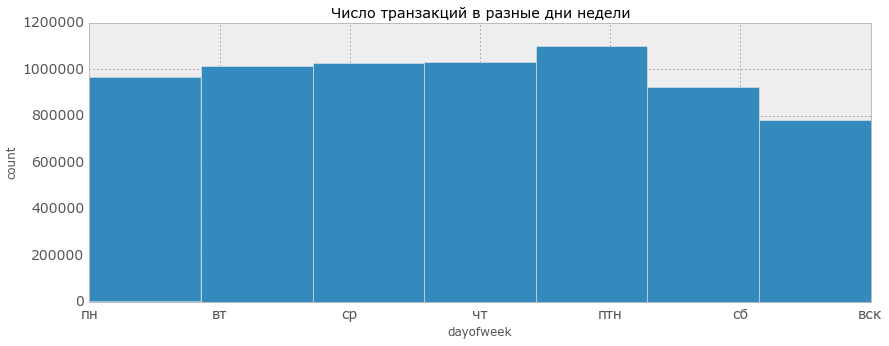

In [24]:
figsize(14, 5)
p = transactions.dayofweek.hist(bins=7) # там есть 60!
p.set_xlabel('dayofweek')
p.set_ylabel('count')
p.set_xlim([0, 6])
p.set_xticklabels([u'пн', u'вт', u'ср', u'чт', u'птн', u'сб', u'вск'])
p.set_title(u'Число транзакций в разные дни недели')
transactions.dayofweek.value_counts()

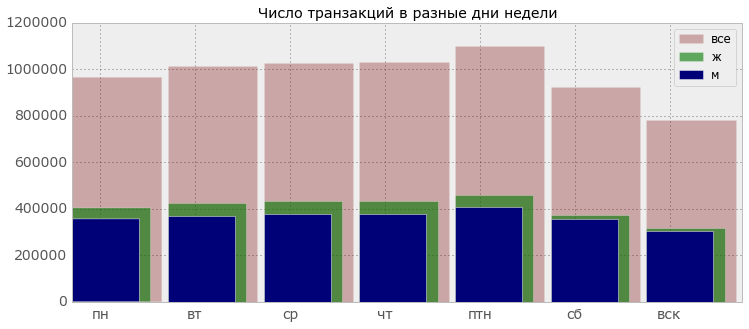

In [60]:
figsize(12,5)
plt.hist(transactions.dayofweek.values, bins=7, color='#770000', label=u'все', alpha=0.3, width=0.8) # , histtype='stepfilled', normed=True,
plt.hist(transactions[transactions.gender==0].dayofweek.values, bins=7, color='#007700', label=u'ж', alpha=0.6, width=0.7)
plt.hist(transactions[transactions.gender==1].dayofweek.values, bins=7, color='#000077', label=u'м', alpha=1.0, width=0.6)
plt.xticks(0.25+ 0.85*np.arange(7), [u'пн', u'вт', u'ср', u'чт', u'птн', u'сб', u'вск']) # , rotation='vertical'
plt.title(u'Число транзакций в разные дни недели')
plt.legend()

0     895545
29    100111
14     99811
47     99775
18     99760
Name: second, dtype: int64

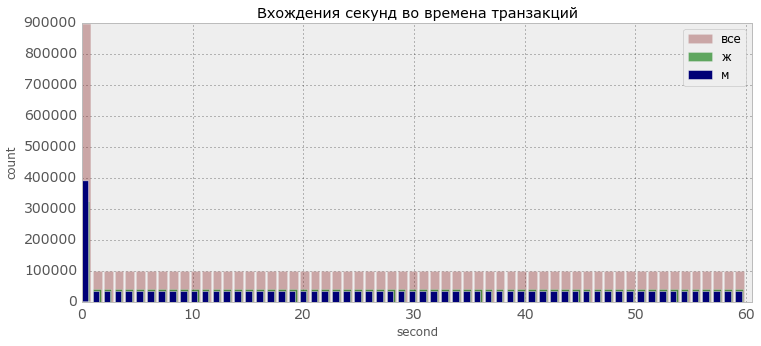

In [72]:
figsize(12,5)
# там есть 60!
plt.hist(transactions.second.values, bins=61, color='#770000', label=u'все', alpha=0.3, width=0.8) # , histtype='stepfilled', normed=True,
plt.hist(transactions[transactions.gender==0].second.values, bins=61, color='#007700', label=u'ж', alpha=0.6, width=0.7)
plt.hist(transactions[transactions.gender==1].second.values, bins=61, color='#000077', label=u'м', alpha=1.0, width=0.6)
plt.xlabel('second')
plt.ylabel('count')
plt.title(u'Вхождения секунд во времена транзакций')
plt.legend()
plt.xlim([0, 60.5])
transactions.second.value_counts()[:5]

In [70]:
print (transactions[transactions.gender==0].second.value_counts()[:5])
print (transactions[transactions.gender==1].second.value_counts()[:5]) # у мужчин это чаще!!!

0     323133
23     42586
16     42445
51     42390
33     42368
Name: second, dtype: int64
0     390156
47     36365
44     36331
14     36282
18     36281
Name: second, dtype: int64


0     896413
13    102054
12    102011
16    101938
25    101922
Name: minute, dtype: int64

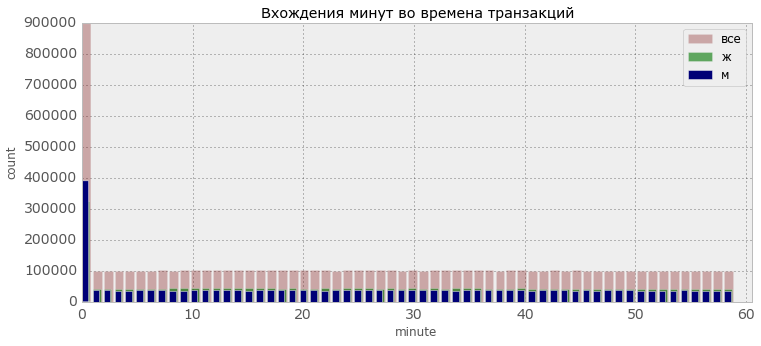

In [73]:
figsize(12,5)
# там есть 60!
plt.hist(transactions.minute.values, bins=60, color='#770000', label=u'все', alpha=0.3, width=0.8) # , histtype='stepfilled', normed=True,
plt.hist(transactions[transactions.gender==0].minute.values, bins=60, color='#007700', label=u'ж', alpha=0.6, width=0.7)
plt.hist(transactions[transactions.gender==1].minute.values, bins=60, color='#000077', label=u'м', alpha=1.0, width=0.6)
plt.xlabel('minute')
plt.ylabel('count')
plt.title(u'Вхождения минут во времена транзакций')
plt.legend()
plt.xlim([0, 60.5])
transactions.minute.value_counts()[:5]

In [89]:
transactions['new'] = (transactions.minute==0) & (transactions.second==0) & (transactions.hour==0)
pd.crosstab(transactions.new, transactions.gender)

gender        0        1
new                     
False   2563868  2193579
True     281466   354424

In [99]:
# что это за нулевое время...
transactions[transactions.new==True][::50000]

customer_id  mcc_code  tr_type    amount   term_id  gender  num_day  \
28          39026145      5331     1110  -6288.56       NaN       1       15   
351586       1521146      4814     1100  -2245.92  22866601       1      448   
864613      99289665      7995     1100  -8085.30  77062921     NaN      321   
1237730     60105418      4814     1100 -10541.21    808444     NaN      262   
1633848     95088517      5411     1110  -8792.76    549433       0      285   
2043057     15042508      5812     1110  -3627.15  60002172       1      259   
2469154     51301561      5814     1110  -8197.59  26021804       0      235   
2929955     64756863      5964     1200 -16219.33       NaN       1       18   
3398608     79492634      5441     1110 -17095.91  25006972       0      264   
3796662     63823503      7832     1110  -7636.11  21479734     NaN      320   
4285633     49495176      7311     1100  -2245.92    808276       1      433   
4752562     11341232      5533     1110  -4491.83       NaN       1      134   
5182846     63801566      5411     1110 -16597.32  23697538       0      443   
5604376     70192661      6051     1100  -8961.20  03170966       1      345   
6025278      6916077      5045     1110 -55923.30  00723019       1      385   
6457435     91437038      5735     1200  -2358.21       NaN       1       90   

         datetime  hour  minute  second  dayofweek   new  
28       00:00:00     0       0       0          5  True  
351586   00:00:00     0       0       0          4  True  
864613   00:00:00     0       0       0          3  True  
1237730  00:00:00     0       0       0          0  True  
1633848  00:00:00     0       0       0          2  True  
2043057  00:00:00     0       0       0          4  True  
2469154  00:00:00     0       0       0          1  True  
2929955  00:00:00     0       0       0          1  True  
3398608  00:00:00     0       0       0          2  True  
3796662  00:00:00     0       0       0          2  True  
4285633  00:00:00     0       0       0          3  True  
4752562  00:00:00     0       0       0          5  True  
5182846  00:00:00     0       0       0          6  True  
5604376  00:00:00     0       0       0          6  True  
6025278  00:00:00     0       0       0          4  True  
6457435  00:00:00     0       0       0          3  True

In [93]:
# transactions[transactions.new==True]['tr_type'].unique()

0     842343
13    449586
12    443782
15    432270
14    430720
Name: hour, dtype: int64

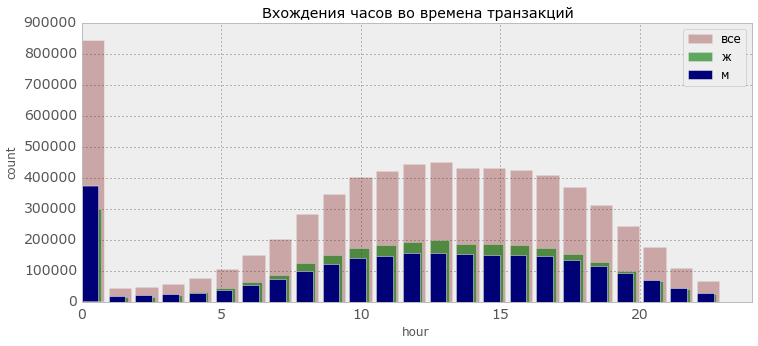

In [78]:
figsize(12,5)
# там есть 60!
plt.hist(transactions.hour.values, bins=24, color='#770000', label=u'все', alpha=0.3, width=0.8) # , histtype='stepfilled', normed=True,
plt.hist(transactions[transactions.gender==0].hour.values, bins=24, color='#007700', label=u'ж', alpha=0.6, width=0.7)
plt.hist(transactions[transactions.gender==1].hour.values, bins=24, color='#000077', label=u'м', alpha=1.0, width=0.6)
plt.xlabel('hour')
plt.ylabel('count')
plt.title(u'Вхождения часов во времена транзакций')
plt.legend()
plt.xlim([0, 24])
transactions.hour.value_counts()[:5]

In [79]:
# число дней
transactions.num_day.nunique()

457

314    20552
272    20368
441    20203
448    20178
425    19979
Name: num_day, dtype: int64

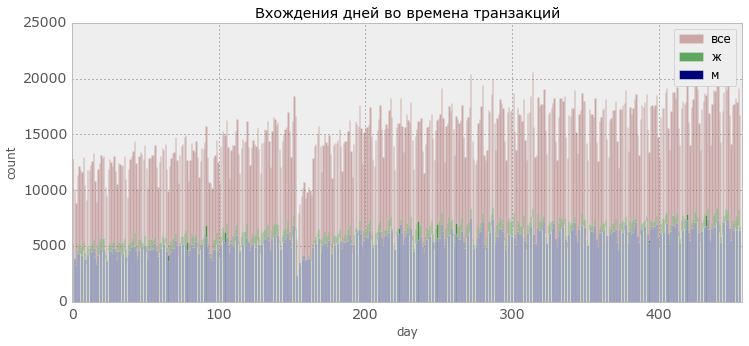

In [87]:
figsize(12,5)
# там есть 60!
plt.hist(transactions.num_day.values, bins=457, color='#770000', label=u'все', alpha=0.3, width=0.9) # , histtype='stepfilled', normed=True,
plt.hist(transactions[transactions.gender==0].num_day.values, bins=457, color='#007700', label=u'ж', alpha=0.6, width=0.7)
plt.hist(transactions[transactions.gender==1].num_day.values, bins=457, color='#000077', label=u'м', alpha=1.0, width=0.5)
plt.xlabel('day')
plt.ylabel('count')
plt.title(u'Вхождения дней во времена транзакций')
plt.legend()
plt.xlim([0, 457])
# plt.xlim([153-10, 153+(120-1) + 4 + 10])
transactions.num_day.value_counts()[:5]

In [88]:
457-153

304

In [101]:
tmp = transactions.groupby('customer_id')
f1 = tmp.amount.count().values
f2 = tmp.amount.mean().values
g = tmp.gender.mean().values

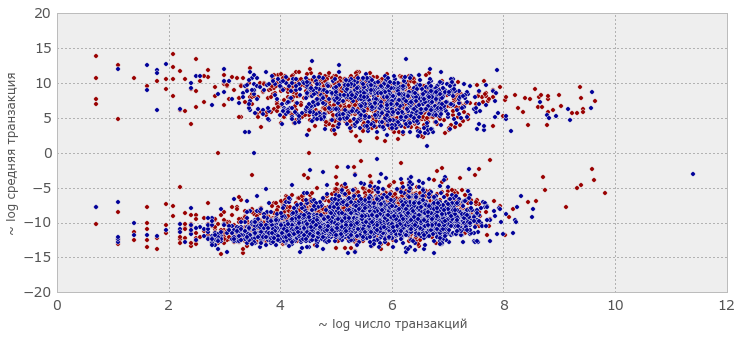

In [112]:
plt.scatter(np.log(f1[g==0]+1), np.sign(f2[g==0])*np.log(np.abs(f2[g==0])+1), c='#990000')
plt.scatter(np.log(f1[g==1]+1), np.sign(f2[g==1])*np.log(np.abs(f2[g==1])+1), c='#000099')
plt.xlabel(u'~ log число транзакций')
plt.ylabel(u'~ log средняя транзакция')

In [17]:
tmp = transactions.groupby('customer_id')
f1 = tmp.amount.apply(lambda x: sum(x[x>0])).values
f2 = tmp.amount.apply(lambda x: sum(x[x<0])).values
g = tmp.gender.mean().values

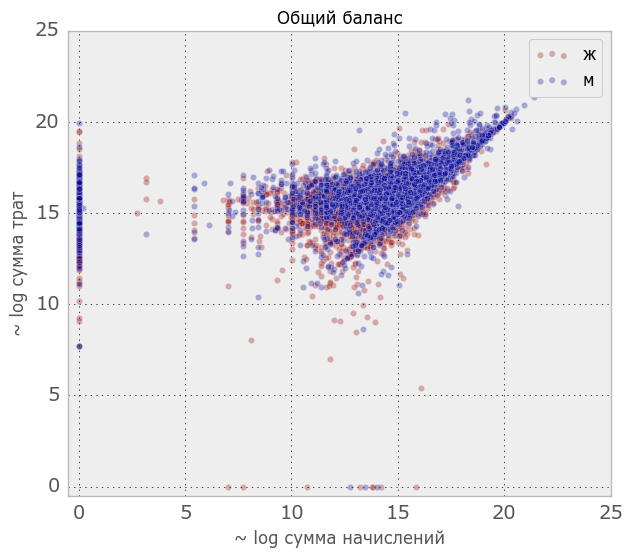

In [22]:
figsize(7, 6)
plt.scatter(np.log(f1[g==0] + 1.0), np.log(1.0 - f2[g==0]), c='#990000', s=20, alpha = 0.3, label=u'ж')
plt.scatter(np.log(f1[g==1] + 1.0), np.log(1.0 - f2[g==1]), c='#000099', s=20, alpha = 0.3, label=u'м')
plt.xlabel(u'~ log сумма начислений')
plt.ylabel(u'~ log сумма трат')
plt.xlim([-0.5, 25])
plt.ylim([-0.5, 25])
plt.title(u'Общий баланс', fontsize=12)
plt.legend()

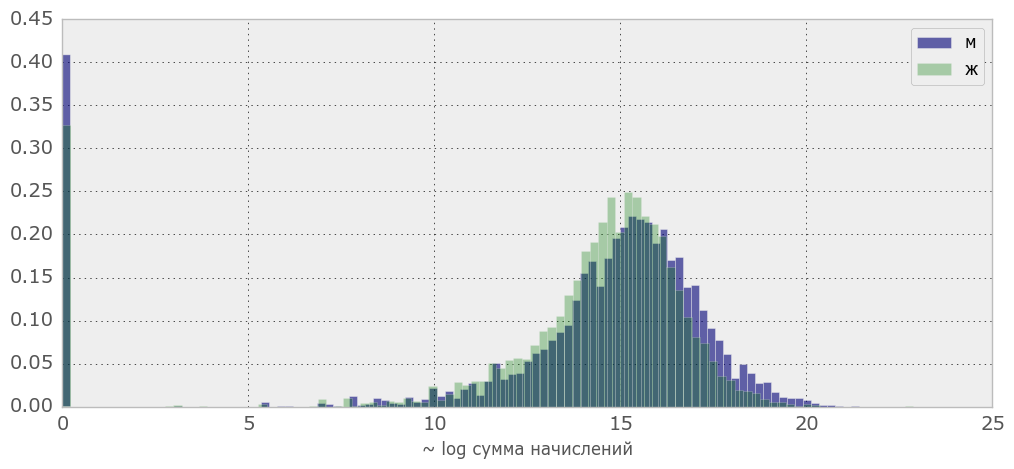

In [34]:
figsize(12, 5)
plt.hist(np.log(f1[g==1] + 1.0), bins=100, color='#000077', label=u'м', alpha=0.6, normed=True)
plt.hist(np.log(f1[g==0] + 1.0), bins=100, color='#007700', label=u'ж', alpha=0.3, normed=True)
plt.legend()
plt.xlabel(u'~ log сумма начислений')
plt.show()

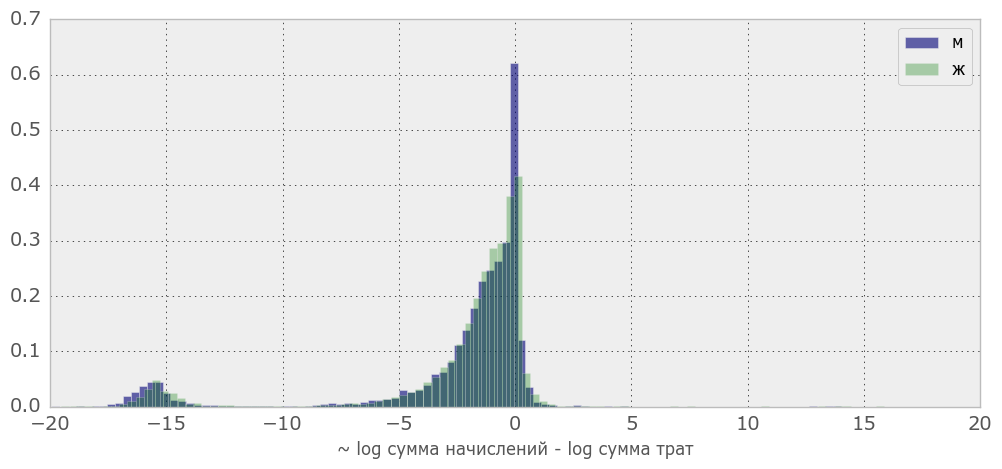

In [43]:
figsize(12, 5)
plt.hist(np.log(f1[g==1] + 1.0) - np.log(-f2[g==1] + 1.0), bins=100, color='#000077', label=u'м', alpha=0.6, normed=True)
plt.hist(np.log(f1[g==0] + 1.0) - np.log(-f2[g==0] + 1.0), bins=100, color='#007700', label=u'ж', alpha=0.3, normed=True)
plt.legend()
plt.xlabel(u'~ log сумма начислений - log сумма трат')
plt.show()

In [41]:
tmp = np.log(f1[g==1] + 1.0) - np.log(f2[g==1] + 1.0)
max(tmp), min(tmp)

(nan, nan)

In [132]:
tmp = transactions.groupby('customer_id')
f1 = tmp.amount.apply(lambda x: mean(x[x>0])).values
f2 = tmp.amount.apply(lambda x: mean(x[x<0])).values
g = tmp.gender.mean().values

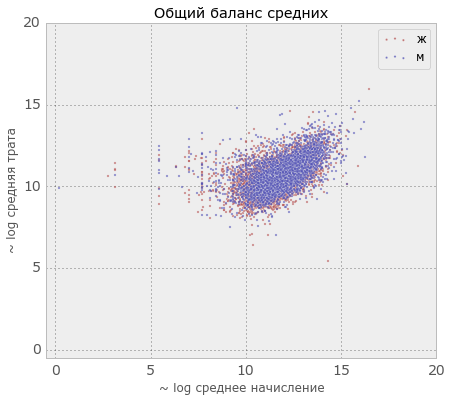

In [140]:
figsize(7, 6)
plt.scatter(np.log(f1[g==0] + 1.0), np.log(1.0 - f2[g==0]), c='#990000', s=5, alpha = 0.5, label=u'ж')
plt.scatter(np.log(f1[g==1] + 1.0), np.log(1.0 - f2[g==1]), c='#000099', s=5, alpha = 0.5, label=u'м')
plt.xlabel(u'~ log среднее начисление')
plt.ylabel(u'~ log средняя трата')
plt.xlim([-0.5, 20])
plt.ylim([-0.5, 20])
plt.title(u'Общий баланс средних')
plt.legend()

In [148]:
# просто эксперимент
df = pd.DataFrame({'a':[1,1,1,1,1,1,2,2,2,2,2], 'b':[3,2,4,2,3,1,2,3,4,3,2]})
df.groupby('a').b.apply(lambda x: sum(x==1))

a
1    1
2    0
Name: b, dtype: int64

tr_type   amount                                     tr_description
0      1010  1589734                              Покупка. POS ТУ СБ РФ
1      2010  1040713              Выдача наличных в АТМ Сбербанк России
2      1030   970994                     Оплата услуги. Банкоматы СБ РФ
3      1110   928154                             Покупка. POS ТУ Россия
4      7070   691896  Перевод на карту (с карты) через Мобильный бан...
5      2370   376521  Списание с карты на карту по операции <перевод...
6      7010   258088       Взнос наличных через АТМ (в своем тер.банке)
7      7030   155200  Перевод на карту (с карты) через АТМ (в предел...
8      1100   117870                                Покупка. ТУ  Россия
9      7071    96146  Перевод на карту (с карты) через Мобильный бан...
10     1200    90742                               Покупка. Зарубеж. ТУ
11     2330    69633  Списание с карты по операции “перевода с карты...
12     2371    65809  Списание с карты на карту по операции <перевод...
13     4071    65806  Плата за перевод на карту (с карты) через Моби...
14     2011    63127      Выдача наличных в АТМ Сбербанка (в других ТБ)

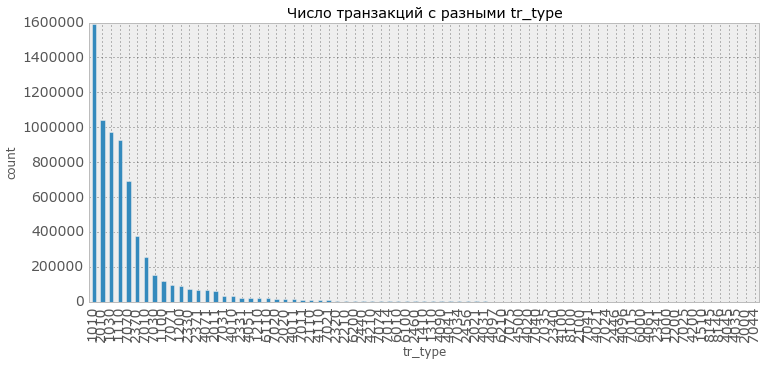

In [183]:
# Самые популярные tr_types
tmp = transactions.groupby('tr_type').amount.count()
tmp.sort(ascending=False)
figsize(12, 5)
tmp.plot(kind='bar')
# plt.bar(np.arange(len(f)), f) f = tmp.values
plt.xlabel('tr_type')
plt.ylabel('count')
plt.title(u'Число транзакций с разными tr_type')
pd.merge(tmp[:15].reset_index(), tr_types)
#plt.plot(np.sort(tmp.amount.sum().values))

In [189]:
# Гендерные tr_types

tmp = pd.merge(pd.crosstab(transactions.tr_type, transactions.gender).reset_index(), tr_types)
tmp[:5]
abs(tmp[0.0] - tmp[1.0])/(tmp[0.0] + tmp[1.0])
tmp['k'] = (abs(tmp[0.0] - tmp[1.0])/(tmp[0.0] + tmp[1.0]))

tmp = tmp[(tmp[0.0] + tmp[1.0]) > 50] # е. достаточно статистики


tmp.sort('k',  ascending=False, inplace=True)
#del tmp['gender']
tmp.columns = [u'tr_type', u'ж', u'м', u'tr_type_description', u'k']
tmp.set_index(tmp.tr_type, inplace=True)
del tmp['tr_type']
tmp[:10]

ж     м                                tr_type_description  \
tr_type                                                                  
6210       39   377                    Возврат покупки.POS Зарубеж. ТУ   
8100      107    15     Списание после проведения претензионной работы   
1310      130   749                                                н/д   
7075       58   332  Перевод с карты на карту в овердрафте через Мо...   
7034      518   138  Перевод на карту/ с карты через АТМ (без взима...   
1410      240   854                                                н/д   
7035       52   119  Перевод на карту/ с карты через АТМ (со взиман...   
6200     2183  1150                      Возврат  покупки. Зарубеж. ТУ   
4100       77    41                Плата за получение наличных. Россия   
2320     2539  1444     Безналичный перевод денежных средств через POS   

                k  
tr_type            
6210     0.812500  
8100     0.754098  
1310     0.704209  
7075     0.702564  
7034     0.579268  
1410     0.561243  
7035     0.391813  
6200     0.309931  
4100     0.305085  
2320     0.274918

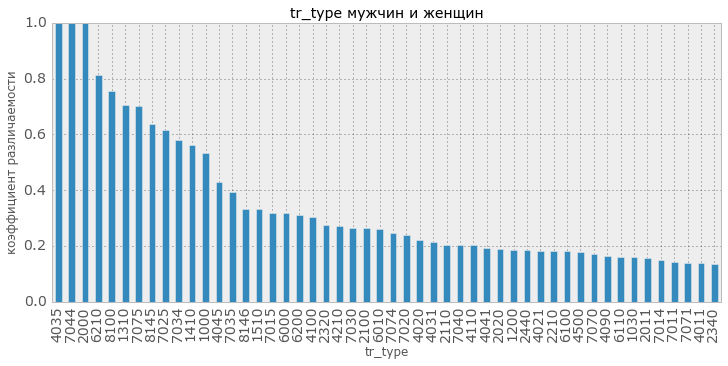

In [186]:
p = tmp[:50].k.plot(kind='bar')
p.set_ylabel(u'коэффициент различаемости')
p.set_title(u'tr_type мужчин и женщин')

mcc_code   amount                                    mcc_description
0       6011  1447370  Финансовые институты — снятие наличности автом...
1       6010  1021046   Финансовые институты — снятие наличности вручную
2       4814   987181  Звонки с использованием телефонов, считывающих...
3       5411   961860                  Бакалейные магазины, супермаркеты
4       4829   624643                                  Денежные переводы
5       5499   336014  Различные продовольственные магазины — рынки, ...
6       5541   141825                            Станции техобслуживания
7       5912   134031                                             Аптеки
8       5331   127890                             Универсальные магазины
9       5812   106854             Места общественного питания, рестораны
10      5814    96839                              Рестораны, закусочные
11      5921    58705  Магазины с продажей спиртных напитков на вынос...
12      5999    54160                 Плавательные бассейны — распродажа
13      5311    36081                                         Универмаги
14      5977    34863                                 Магазины косметики

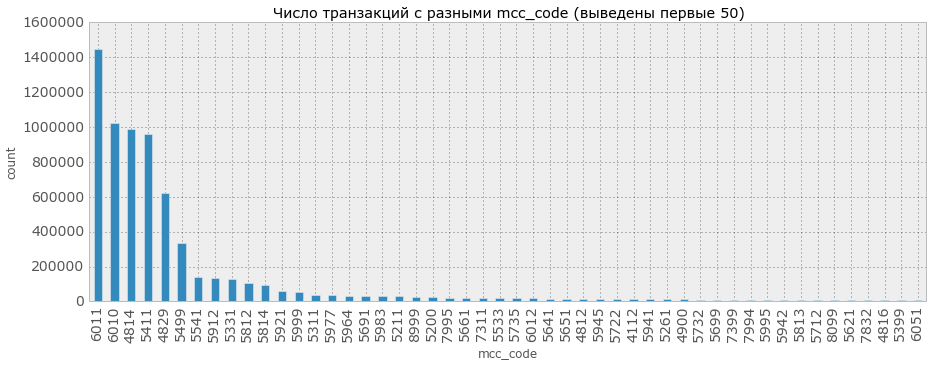

In [214]:
# Популярные mcc_code

tmp = transactions.groupby('mcc_code').amount.count()
tmp.sort(ascending=False)
figsize(15, 5)
tmp[:50].plot(kind='bar') ##### 50!
# plt.bar(np.arange(len(f)), f) f = tmp.values
plt.xlabel('mcc_code')
plt.ylabel('count')
plt.title('Число транзакций с разными mcc_code (выведены первые 50)')
pd.merge(tmp[:15].reset_index(), tr_mcc_codes)
#plt.plot(np.sort(tmp.amount.sum().values))

In [187]:
# гендерные mcc_code
tmp = pd.merge(pd.crosstab(transactions.mcc_code, transactions.gender).reset_index(), tr_mcc_codes)
tmp[:5]
abs(tmp[0.0] - tmp[1.0])/(tmp[0.0] + tmp[1.0])
tmp['k'] = (abs(tmp[0.0] - tmp[1.0])/(tmp[0.0] + tmp[1.0]))

tmp.sort('k',  ascending=False, inplace=True)
#del tmp['gender']
tmp.columns = [u'mcc_code', u'ж', u'м', u'mcc_description', u'k']
tmp.set_index(tmp.mcc_code, inplace=True)
del tmp['mcc_code']
tmp[:10]

ж      м                                    mcc_description  \
mcc_code                                                                   
5967         5    289          Прямой маркетинг — входящий телемаркетинг   
5931       335     39  Магазины second hand, магазины б/у товаров, ко...   
7995      2431  15650                       Транзакции по азартным играм   
7994      1164   7404                        Галереи/учреждения видеоигр   
6211       133    776                      Ценные бумаги: брокеры/дилеры   
7512        22    123                                 Прокат автомобилей   
5965       106     19  Прямой маркетинг — комбинированный каталог и т...   
7993       106    591                        Принадлежности для видеоигр   
5013        61    315                  Поставщики грузовиков и запчастей   
5532        89    439                                           Автошины   

                 k  
mcc_code            
5967      0.965986  
5931      0.791444  
7995      0.731099  
7994      0.728291  
6211      0.707371  
7512      0.696552  
5965      0.696000  
7993      0.695839  
5013      0.675532  
5532      0.662879

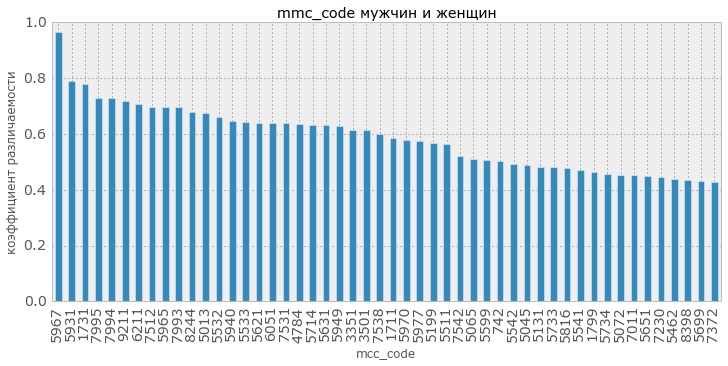

In [182]:
p = tmp[:50].k.plot(kind='bar')
p.set_ylabel(u'коэффициент различаемости')
p.set_title(u'mmc_code мужчин и женщин')

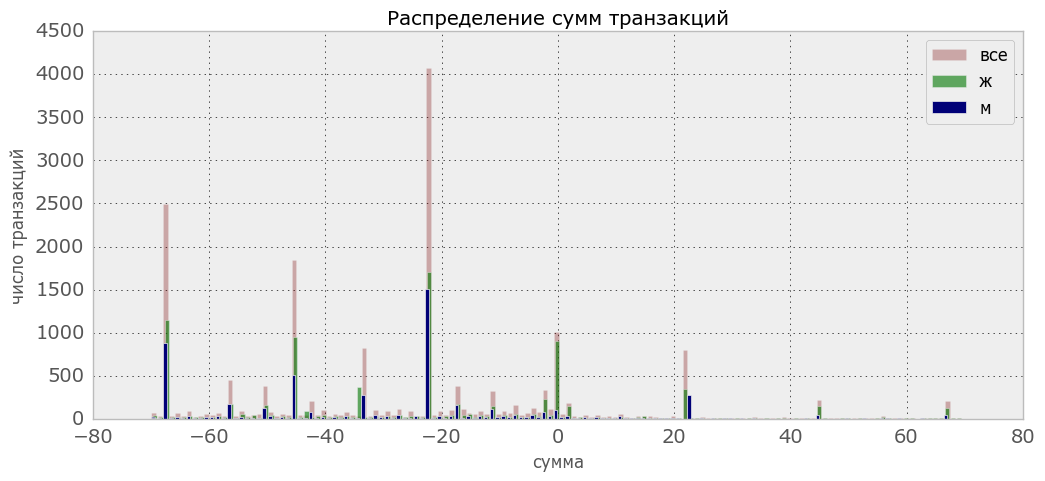

In [51]:
figsize(12,5)
# там есть 60!
plt.hist(transactions[transactions.amount.abs()<70].amount.values, bins=(69*2+1), color='#770000', label=u'все', alpha=0.3, width=0.8) # , histtype='stepfilled', normed=True,
plt.hist(transactions[transactions.amount.abs()<70][transactions.gender==0].amount.values, bins=(69*2+1), color='#007700', label=u'ж', alpha=0.6, width=0.7)
plt.hist(transactions[transactions.amount.abs()<70][transactions.gender==1].amount.values, bins=(69*2+1), color='#000077', label=u'м', alpha=1.0, width=0.6)
plt.xlabel('сумма')
plt.ylabel('число транзакций')
plt.title(u'Распределение сумм транзакций')
plt.legend()
#plt.xlim([0, 24])
#transactions.amount.value_counts()[:5]


In [239]:
tmp = transactions.amount.values

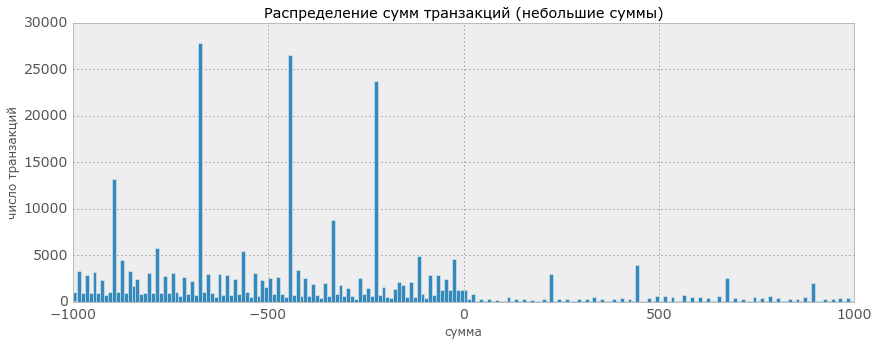

In [271]:
p = transactions[transactions.amount.abs()<1000].amount.hist(bins=200)
p.set_xlabel('сумма')
p.set_ylabel('число транзакций')
p.set_title('Распределение сумм транзакций (небольшие суммы)')

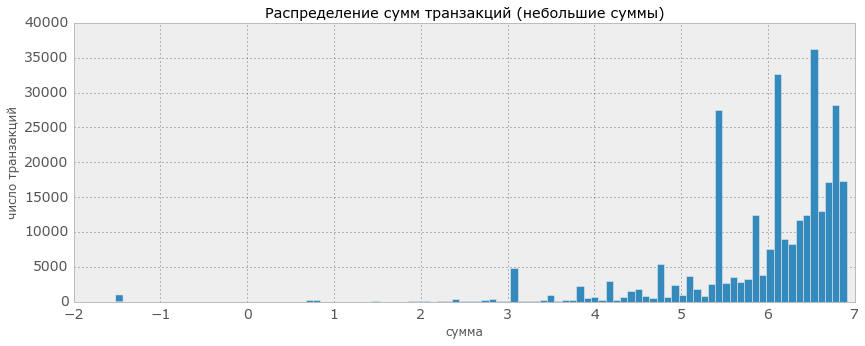

In [264]:
p = transactions[transactions.amount.abs()<1000].amount.apply(lambda x: np.log(np.abs(x))).hist(bins=100)
p.set_xlabel('сумма')
p.set_ylabel('число транзакций')
p.set_title('Распределение сумм транзакций (небольшие суммы)')

1     1199319
2      663760
3      362440
4      201677
5      109856
6       62705
7       35667
8       21291
9       12638
10       8564
Name: amount, dtype: int64

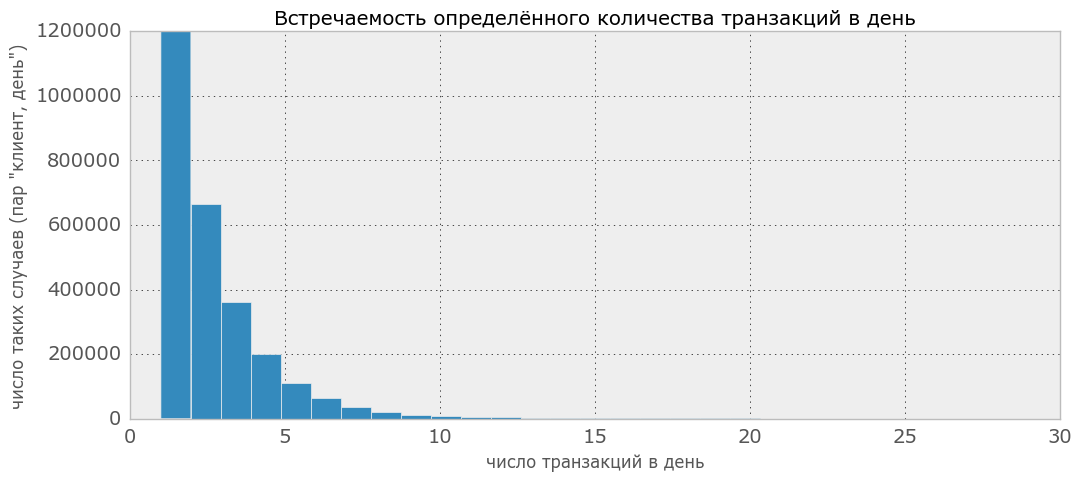

In [56]:
tmp = transactions.groupby(['num_day', 'customer_id']).amount.count()
p = tmp[tmp<=30].hist(bins=30)
p.set_xlabel('число транзакций в день')
p.set_ylabel('число таких случаев (пар "клиент, день")')
p.set_title('Встречаемость определённого количества транзакций в день')
tmp.value_counts()[:10]

(0, 30)

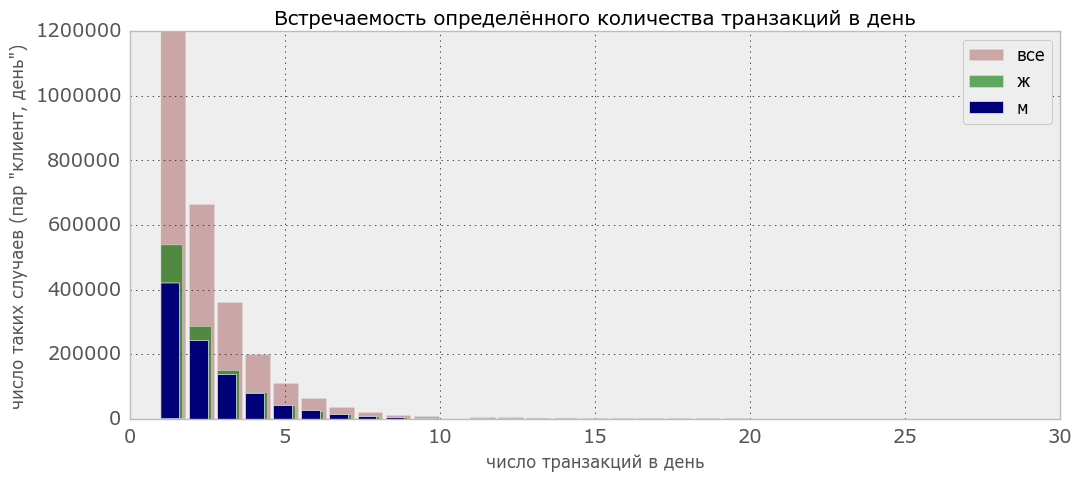

In [64]:
tmp = transactions.groupby(['num_day', 'customer_id']).amount.count()
tmp1 = transactions[transactions.gender==0].groupby(['num_day', 'customer_id']).amount.count()
tmp2 = transactions[transactions.gender==1].groupby(['num_day', 'customer_id']).amount.count()

figsize(12,5)
# там есть 60!
plt.hist(tmp[tmp<31], bins=32, color='#770000', label=u'все', alpha=0.3, width=0.8) # , histtype='stepfilled', normed=True,
plt.hist(tmp1[tmp<31], bins=32, color='#007700', label=u'ж', alpha=0.6, width=0.7)
plt.hist(tmp2[tmp<31], bins=32, color='#000077', label=u'м', alpha=1.0, width=0.6)
plt.xlabel(u'число транзакций в день')
plt.ylabel(u'число таких случаев (пар "клиент, день")')
plt.title(u'Встречаемость определённого количества транзакций в день')
plt.legend()
plt.xlim([0, 30])

In [66]:
tmp = transactions.groupby(['num_day', 'customer_id']).amount.count()
tmp = tmp.unstack()

In [68]:
tmp[:5]

customer_id  6815      22899     27914     28753     31385     38084     \
num_day                                                                   
0                 NaN       NaN       NaN       1.0       1.0       NaN   
1                 NaN       1.0       NaN       NaN       NaN       1.0   
2                 NaN       1.0       NaN       NaN       NaN       NaN   
3                 NaN       NaN       NaN       4.0       1.0       NaN   
4                 NaN       NaN       NaN       1.0       NaN       1.0   

customer_id  42096     49101     49793     50940     52926     53395     \
num_day                                                                   
0                 1.0       NaN       1.0       NaN       NaN       NaN   
1                 4.0       NaN       1.0       NaN       NaN       NaN   
2                 3.0       NaN       NaN       NaN       NaN       NaN   
3                 1.0       NaN       1.0       NaN       NaN       NaN   
4                 3.0       NaN       1.0       NaN       NaN       NaN   

customer_id  70680     78659     81626     85327     85635     104032    \
num_day                                                                   
0                 NaN       NaN       NaN       1.0       NaN       NaN   
1                 NaN       NaN       NaN       NaN       NaN       1.0   
2                 NaN       NaN       NaN       NaN       NaN       NaN   
3                 NaN       NaN       NaN       NaN       NaN       NaN   
4                 1.0       NaN       NaN       NaN       NaN       NaN   

customer_id  114348    115617    117556    126081    126935    127946    \
num_day                                                                   
0                 NaN       NaN       2.0       NaN       NaN       NaN   
1                 2.0       NaN       NaN       NaN       1.0       NaN   
2                 NaN       2.0       4.0       2.0       NaN       NaN   
3                 NaN       NaN       3.0       NaN       NaN       NaN   
4                 NaN       NaN       NaN       NaN       NaN       NaN   

customer_id  137367    168767    172390    174467    177299    186730    \
num_day                                                                   
0                 NaN       NaN       NaN       NaN       NaN       NaN   
1                 NaN       NaN       NaN       NaN       NaN       NaN   
2                 NaN       1.0       NaN       NaN       NaN       NaN   
3                 NaN       NaN       NaN       NaN       NaN       NaN   
4                 1.0       NaN       NaN       NaN       NaN       3.0   

customer_id  189257    199565    214804    218079    225025    232342    \
num_day                                                                   
0                 2.0       NaN       1.0       1.0       2.0       NaN   
1                 1.0       NaN       NaN       NaN       NaN       NaN   
2                 1.0       NaN       2.0       1.0       NaN       NaN   
3                 NaN       1.0       1.0       2.0       2.0       NaN   
4                 1.0       6.0       4.0       NaN       NaN       NaN   

customer_id  251590    263605    272657    277885    279454    280339    \
num_day                                                                   
0                 2.0       NaN       NaN       NaN       NaN       1.0   
1                 NaN       NaN       NaN       NaN       NaN       NaN   
2                 NaN       NaN       1.0       NaN       1.0       NaN   
3                 1.0       1.0       2.0       NaN       2.0       NaN   
4                 2.0       NaN       3.0       NaN       NaN       2.0   

customer_id  281727    293048    302489    307854    308038    312146    \
num_day                                                                   
0                 NaN       NaN       1.0       3.0       NaN       1.0   
1                 NaN       NaN       1.0       3.0       NaN       1.0   
2                 

In [221]:
user = transactions.customer_id.unique()[100]

tr = transactions[transactions.customer_id == user]
tr[:20]

customer_id  mcc_code  tr_type     amount term_id  num_day  datetime  \
57808     69942970      5661     1110   -5794.46     NaN        0  20:28:55   
57809     69942970      5311     1110 -130263.11     NaN        0  21:08:18   
57810     69942970      6011     2010 -110049.87     NaN        0  21:17:53   
57811     69942970      6011     2010 -222345.66     NaN        0  21:17:34   
57812     69942970      5411     1010   -9634.98     NaN        0  21:35:26   
57813     69942970      5411     1010  -34182.84     NaN        1  21:32:34   
57814     69942970      5912     1010   -9006.12     NaN        2  13:27:37   
57815     69942970      5499     1110   -9620.83     NaN        2  13:44:44   
57816     69942970      5942     1010  -21089.15     NaN       31  19:22:02   
57817     69942970      5942     1010  -14430.01     NaN       34  18:46:48   
57818     69942970      4814     1030  -11229.58     NaN       38  02:22:25   
57819     69942970      6011     2010 -110049.87     NaN       39  18:03:42   
57820     69942970      6011     2010 -110049.87     NaN       41  17:41:57   
57821     69942970      4814     1030   -2245.92     NaN       48  18:18:30   
57822     69942970      4814     1030   -5951.68     NaN       48  18:18:51   
57823     69942970      4814     1030  -11229.58     NaN       53  19:09:12   
57824     69942970      6011     2010 -110049.87     NaN       53  19:13:27   
57825     69942970      5411     1010  -25446.23     NaN       53  20:12:16   
57826     69942970      6011     2010  -89836.63     NaN       54  18:40:44   
57827     69942970      4814     1030   -4491.83     NaN       54  18:41:16   

       hour  minute  second  dayofweek  
57808    20      28      55          4  
57809    21       8      18          4  
57810    21      17      53          4  
57811    21      17      34          4  
57812    21      35      26          4  
57813    21      32      34          5  
57814    13      27      37          6  
57815    13      44      44          6  
57816    19      22       2          0  
57817    18      46      48          3  
57818     2      22      25          0  
57819    18       3      42          1  
57820    17      41      57          3  
57821    18      18      30          3  
57822    18      18      51          3  
57823    19       9      12          1  
57824    19      13      27          1  
57825    20      12      16          1  
57826    18      40      44          2  
57827    18      41      16          2

In [276]:
tmp = tr.mcc_code.value_counts()
tmp.to_dict()

df_mcc = pd.DataFrame({'mcc':transactions.mcc_code.unique()})
df_mcc['new'] = df_mcc.mcc.map(tmp.to_dict())
df_mcc.new.fillna(0, inplace=True)

#df_mcc.new.tolist()
df_mcc['new'] = df_mcc['new']/df_mcc['new'].sum()
df_mcc

mcc       new
0    4814  0.139456
1    6011  0.108844
2    4829  0.006803
3    5499  0.275510
4    5541  0.000000
5    5200  0.000000
6    5732  0.000000
7    6010  0.003401
8    5331  0.000000
9    5912  0.030612
10   5411  0.173469
11   5812  0.003401
12   6012  0.000000
13   5719  0.006803
14   5722  0.000000
15   5621  0.020408
16   5814  0.006803
17   5921  0.000000
18   5941  0.023810
19   5691  0.034014
20   5813  0.000000
21   5211  0.003401
22   4812  0.023810
23   5945  0.003401
24   5983  0.000000
25   5999  0.003401
26   5943  0.000000
27   5533  0.000000
28   6300  0.000000
29   7832  0.000000
..    ...       ...
154  5192  0.000000
155  5122  0.000000
156   742  0.000000
157  6513  0.000000
158  7278  0.000000
159  5969  0.000000
160  5970  0.000000
161  4131  0.000000
162  5965  0.000000
163  7395  0.000000
164  5950  0.000000
165  5085  0.000000
166  7273  0.000000
167  5137  0.000000
168  5310  0.000000
169  7531  0.000000
170  7829  0.000000
171  7375  0.000000
172  2741  0.000000
173  5172  0.000000
174  8699  0.000000
175  7216  0.000000
176  5451  0.000000
177  5967  0.000000
178  7338  0.000000
179  9402  0.000000
180  5697  0.000000
181  1731  0.000000
182  5940  0.000000
183  9211  0.000000

[184 rows x 2 columns]

(0, 100)

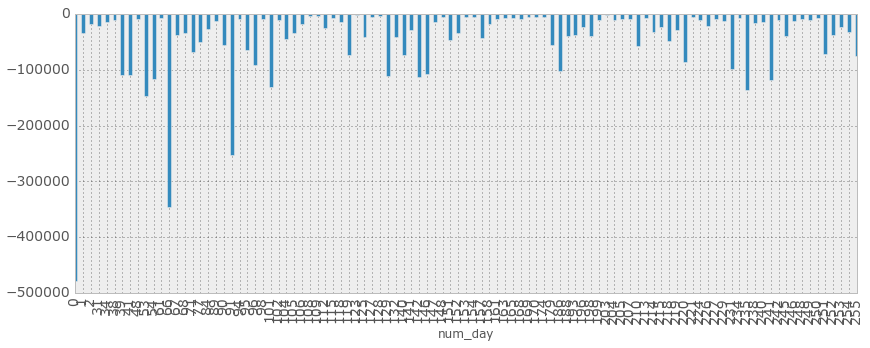

In [146]:
tmp = tr.groupby('num_day').amount.sum()
#lt.plot(tr.d)
p = tmp.plot(kind='bar')
p.set_xlim([0, 100])

In [128]:
print ('Среднее число транзакций:')
print (mean(tmp.amount.count().values))
print (median(tmp.amount.count().values))
print (tr.shape[0])

Среднее число транзакций:
456.623066667
324.5
294
